In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import  confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [2]:
df = pd.read_csv("main.csv")

In [3]:
df.head()

,ctrust,cuntrust,last,context,score
0,4,1,4,sport,untrustworthy
1,4,1,4,sport,untrustworthy
2,1,4,4,sport,trustworthy
3,2,1,4,sport,trustworthy
4,3,1,4,sport,trustworthy


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ctrust    322 non-null    int64 
 1   cuntrust  322 non-null    int64 
 2   last      322 non-null    int64 
 3   context   322 non-null    object
 4   score     322 non-null    object
dtypes: int64(3), object(2)
memory usage: 12.7+ KB


In [5]:
df.shape

(322, 5)

In [6]:
df['context'].value_counts()

holiday      126
sport         98
game          67
ECommerce     31
Name: context, dtype: int64

In [7]:
df['score'].value_counts(1)*100

trustworthy      69.875776
untrustworthy    30.124224
Name: score, dtype: float64

In [8]:
print('ctrust',df.ctrust.unique())
print('cuntrust',df.cuntrust.unique())
print('last',df['last'].unique())
print('context',df.context.unique())
print('score',df.score.unique())

ctrust [4 1 2 3]
cuntrust [1 4 3 5]
last [4 1 3 2]
context ['sport' 'game' 'ECommerce' 'holiday']
score ['untrustworthy' 'trustworthy']


In [9]:
df['score'].replace({'untrustworthy':0,'trustworthy':1},inplace=True)
df.head()

,ctrust,cuntrust,last,context,score
0,4,1,4,sport,0
1,4,1,4,sport,0
2,1,4,4,sport,1
3,2,1,4,sport,1
4,3,1,4,sport,1


In [10]:
df['context'].replace({'sport':1,'game':2,'ECommerce':3,'holiday':4},inplace=True)
df.head()

,ctrust,cuntrust,last,context,score
0,4,1,4,1,0
1,4,1,4,1,0
2,1,4,4,1,1
3,2,1,4,1,1
4,3,1,4,1,1


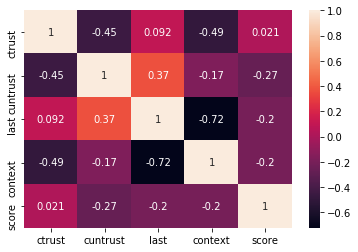

In [11]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

## Split The Data

In [12]:
X = df.drop("score",axis=1)
y = df['score']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=37)

In [14]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Apply Model

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=10)
lr.fit(X_train,y_train)
print("train score",lr.score(X_train,y_train))
print("test score",lr.score(X_test,y_test))

y_pred = lr.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall",recall_score(y_test,y_pred))
print("F1 score",f1_score(y_test,y_pred))

train score 0.8796680497925311
test score 0.8765432098765432
[[22  5]
 [ 5 49]]
Precision:  0.9074074074074074
Recall 0.9074074074074074
F1 score 0.9074074074074074


In [35]:
test_pred = lr.predict([[3,1,4,1]])[0]
if test_pred == 0:
    print("untrustworthy")
else:
    print("trustworthy")

untrustworthy
